### Etapes a suivre Modele, Fonction Cout, Gradient, Gradient Descent

In [5]:
import numpy as np 
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

Etape 1: Creons le Dataset

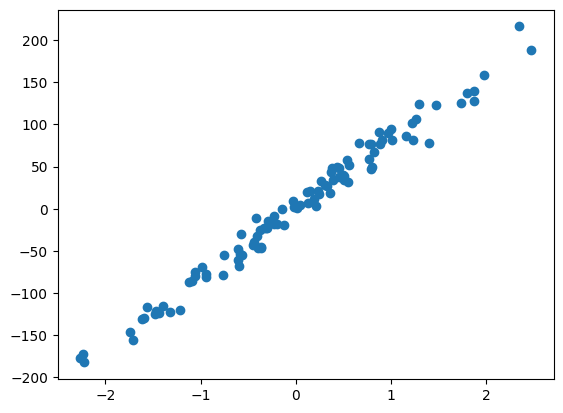

In [40]:
x,y = make_regression(n_samples=100,n_features=1,noise = 10)
plt.scatter(x,y)

In [41]:
#Verifions les dimemnsions de notre matrice()
print(x.shape)
print(y.shape)
#Y etant incomplet on reecrit les dim de y 
y = y.reshape(y.shape[0],1)
print(y.shape)

(100, 1)
(100,)
(100, 1)


In [42]:
# Creons une matrice X
X = np.hstack((x,np.ones(x.shape)))#il colle 2 vecteurs ensemble
X

array([[ 0.19250096,  1.        ],
       [ 1.86645938,  1.        ],
       [ 0.25981581,  1.        ],
       [-0.22873414,  1.        ],
       [ 1.40007527,  1.        ],
       [-1.56227927,  1.        ],
       [ 1.22728277,  1.        ],
       [-1.05984701,  1.        ],
       [ 0.82170902,  1.        ],
       [-0.39349161,  1.        ],
       [-0.29217942,  1.        ],
       [ 0.23510405,  1.        ],
       [ 0.38216998,  1.        ],
       [ 0.45552498,  1.        ],
       [ 0.24751991,  1.        ],
       [ 0.78970894,  1.        ],
       [ 1.29595203,  1.        ],
       [-0.33256141,  1.        ],
       [-0.75682713,  1.        ],
       [-1.440726  ,  1.        ],
       [-0.36787745,  1.        ],
       [-0.61210986,  1.        ],
       [-1.09070027,  1.        ],
       [-1.05837353,  1.        ],
       [ 1.97641669,  1.        ],
       [ 0.14435651,  1.        ],
       [-0.41219295,  1.        ],
       [ 1.87114335,  1.        ],
       [-1.74294013,

In [43]:
#On initialise un vecteur theta (caracterisant les props du modele) avec de params aleatiores
theta = np.random.randn(2,1) # 2 elts car on fait regLineaire (ax+b)
theta



array([[ 1.55900593],
       [-0.57147911]])

Modele Lineaire F=X.O avec O=theta

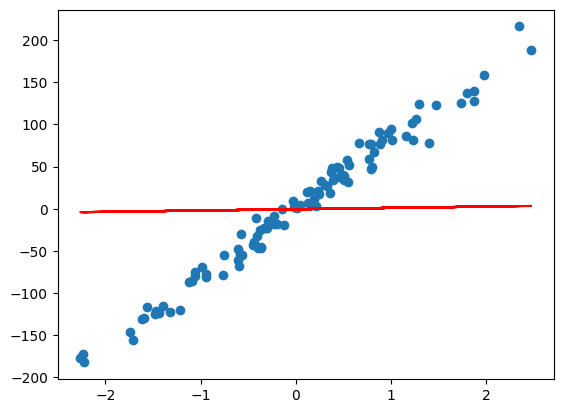

In [44]:
#Maintenant qu'on X,Y,Theta on peut passer au modele
def modeleLineaire(X,theta):
    return X.dot(theta)

plt.scatter(x,y)
#Testons le modele 
plt.plot(x,modeleLineaire(X,theta),c='r')#Affichons le modele par rapport a x

Fonction Cout

In [45]:
def cost_function(X,y,theta):
    m = len(y)
    return 1/(2*m) * np.sum((modeleLineaire(X,theta)-y)**2)

cost_function(X,y,theta) #Lideal serait que cette valeur tende vers 0

3431.7053553642236

Gradient et Gradient Descent

In [46]:
def gradient(X,y,theta):
    m = len(y)
    return 1/m * X.T.dot(modeleLineaire(X,theta)-y)

In [61]:
#Gradient Descent   
def gradientDescent(X,y,theta,learning_rate,n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0,n_iterations):
        theta = theta - learning_rate * gradient(X,y,theta)
        cost_history[i] = cost_function(X,y,theta)
    return theta,cost_history

Machine Learning

In [64]:
theta_final,cost_history = gradientDescent(X,y,theta,learning_rate=0.1,n_iterations=500)
theta_final     

array([[81.19764844],
       [ 0.09306429]])

VErifions si le theta_final nous donne de bon resultat

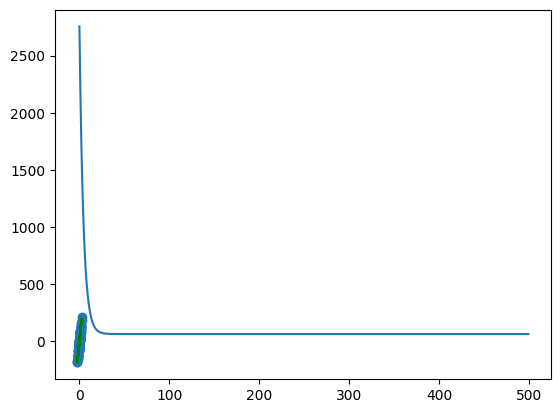

In [65]:
#Creons un vecteur de orediction
predictions = modeleLineaire(X,theta_final)
plt.scatter(x,y)
plt.plot(x,predictions,c='g')

### Courbe D'Apprentissage

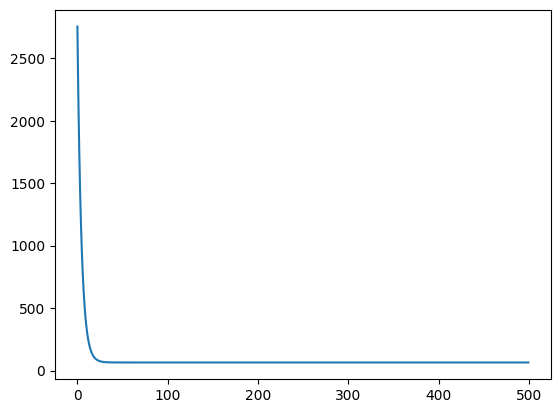

In [66]:

plt.plot(range(500),cost_history)

#On remarque sur le graphe qu'impeu avant les 100 iterations,le cout na pas diminuer,
# on aurait pu arreter apres 60 ou 70 iteration (imoeu avant la 100eme iteration) 

Coefficient de Determination ou R-Squarre

In [68]:
def coef_determination(y,pred):
    u = ((y-pred)**2).sum() 
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

coef_determination(y,predictions)

0.9818504040407083